<a href="https://colab.research.google.com/github/Syd001978/CAPSTONE-BengkelKoding-a112214247/blob/main/Modeling_Deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load file CSV dari folder di Google Drive
file_path = '/content/drive/MyDrive/capstone_bengkod/obesity_preprocessed.csv'
df = pd.read_csv(file_path)

df.head()


Mounted at /content/drive


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,fam_history,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,1,Normal_Weight
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,1,Normal_Weight
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,1,Normal_Weight
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,3,Overweight_Level_I
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,1,Overweight_Level_II


<ipython-input-3-3682728919>:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


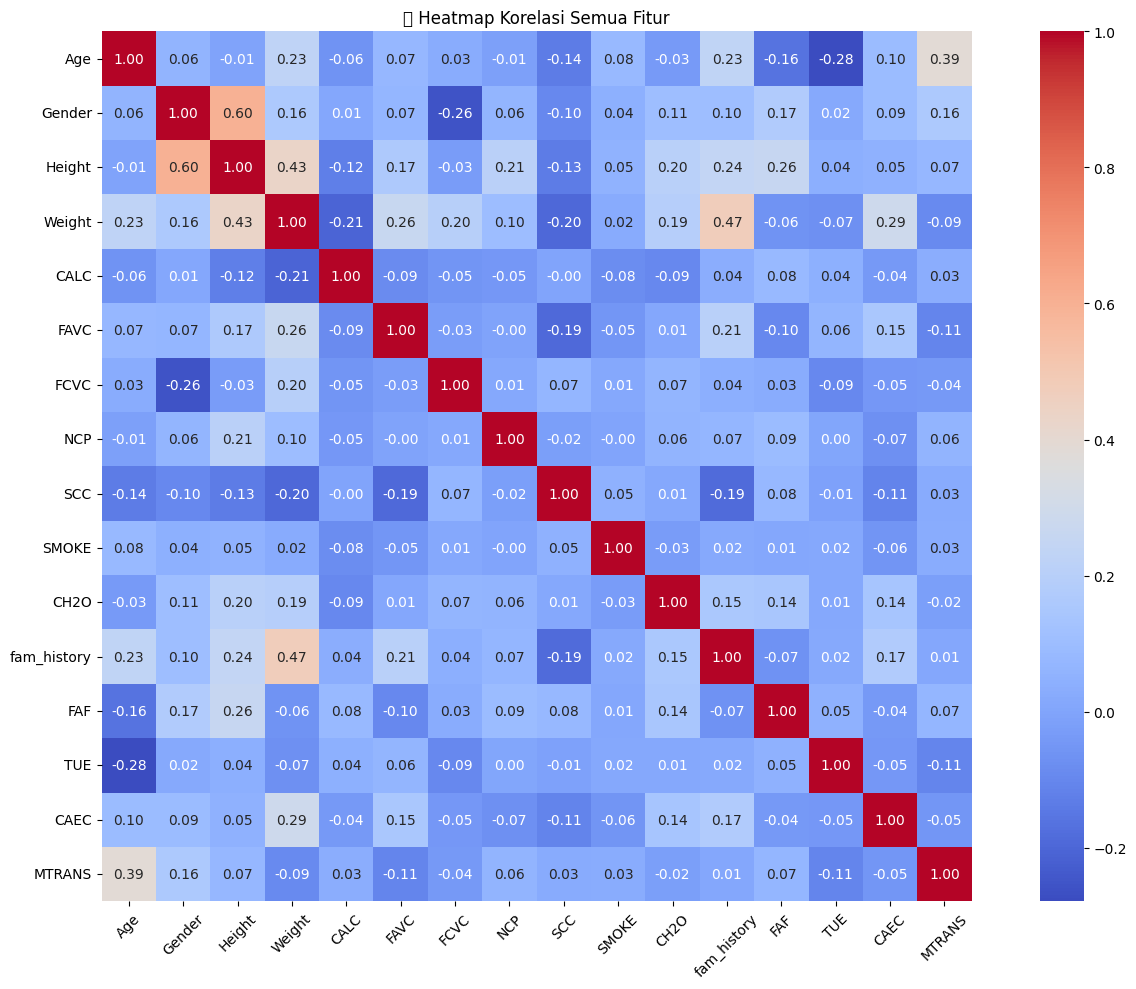

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil semua kolom numerik termasuk int64 & float64, tanpa label
numeric_df = df.drop('NObeyesdad', axis=1)

# Hitung korelasi Pearson
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("🔍 Heatmap Korelasi Semua Fitur")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
import pandas as pd
import matplotlib.pyplot as plt

# Encode target label
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(df['NObeyesdad'])

# Pisahkan fitur
X_features = df.drop('NObeyesdad', axis=1)


Korelasi fitur dengan label berdasarkan ANOVA F-score:
        Feature      F-score        p-value
3        Weight  1195.608384   0.000000e+00
1        Gender   152.107315  1.237409e-160
11  fam_history   145.648872  9.398107e-155
6          FCVC    99.780591  1.080210e-110
0           Age    93.982134  8.172516e-105
14         CAEC    81.096953   1.759870e-91
5          FAVC    43.578216   2.094019e-50
2        Height    36.140285   7.555495e-42
4          CALC    33.764187   4.368130e-39
15       MTRANS    23.921774   1.646670e-27
8           SCC    21.700653   7.169462e-25
12          FAF    17.263496   1.404501e-19
7           NCP    16.423126   1.418221e-18
10         CH2O    15.116869   5.164540e-17
13          TUE     8.101000   1.129192e-08
9         SMOKE     5.421074   1.424093e-05


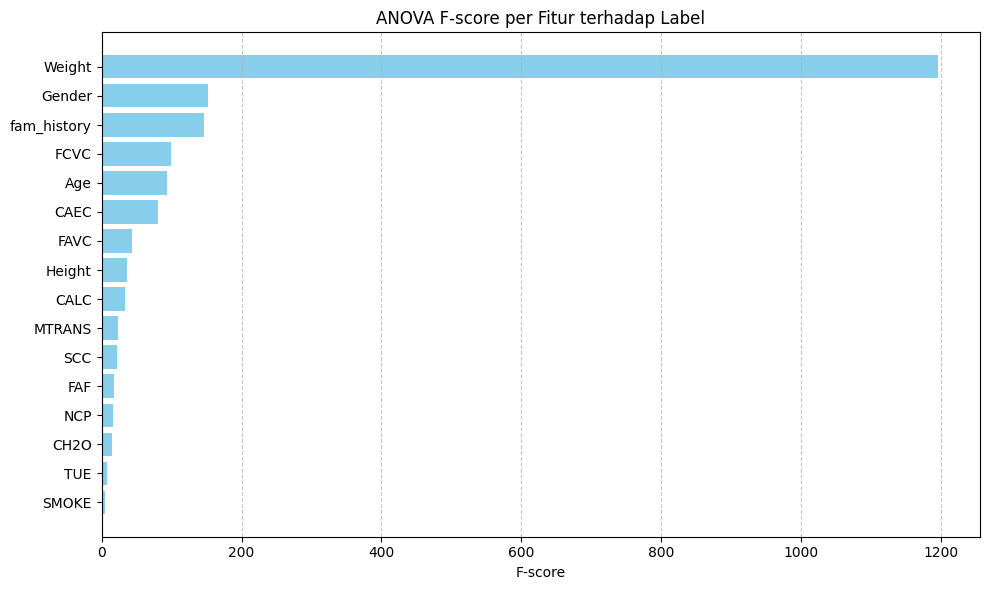

In [5]:
# Hitung F-score ANOVA
f_scores, p_values = f_classif(X_features, y_encoded)

# Simpan ke DataFrame
anova_df = pd.DataFrame({
    'Feature': X_features.columns,
    'F-score': f_scores,
    'p-value': p_values
}).sort_values(by='F-score', ascending=False)

# Tampilkan tabel korelasi
print("Korelasi fitur dengan label berdasarkan ANOVA F-score:")
print(anova_df)

# Visualisasi dengan horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(anova_df['Feature'], anova_df['F-score'], color='skyblue')
plt.xlabel('F-score')
plt.title('ANOVA F-score per Fitur terhadap Label')
plt.gca().invert_yaxis()  # Fitur tertinggi di atas
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

# Pisahkan fitur dan target (y_encoded sudah kita encode sebelumnya)
X_features = df.drop('NObeyesdad', axis=1)

# Pilih K fitur terbaik
k = 5  # atau sesuaikan
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_features, y_encoded)

# Dapatkan nama fitur terpilih
selected_mask = selector.get_support()
selected_features = X_features.columns[selected_mask]

print(f"✅ {k} Fitur terbaik berdasarkan ANOVA F-score:")
print(selected_features.tolist())


✅ 5 Fitur terbaik berdasarkan ANOVA F-score:
['Age', 'Gender', 'Weight', 'FCVC', 'fam_history']


In [7]:
# 1. Pisahkan fitur dan target
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

# Fitur terpilih
selected_features = ['Age', 'Gender', 'Height', 'Weight', 'fam_history']
X = df[selected_features]
y = y_encoded

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



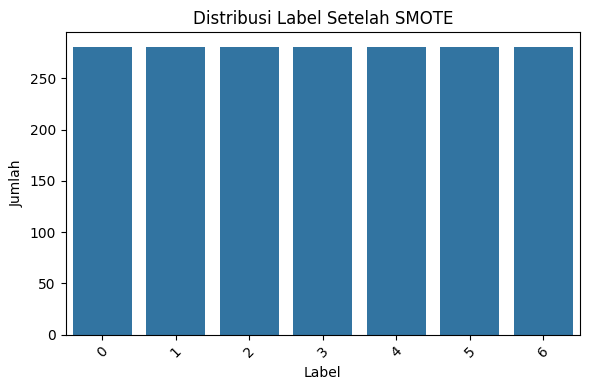

In [8]:
# 3. SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Konversi kembali ke DataFrame
X_train_res = pd.DataFrame(X_train_res, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)

# 4. Visualisasi distribusi label setelah SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_res)
plt.title('Distribusi Label Setelah SMOTE')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🔍 Model: Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.9409
Waktu komputasi: 0.2203 detik
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.91      0.94        54
      Normal_Weight       0.89      0.93      0.91        58
     Obesity_Type_I       0.93      0.97      0.95        70
    Obesity_Type_II       0.98      0.97      0.97        60
   Obesity_Type_III       0.98      0.97      0.98        65
 Overweight_Level_I       0.87      0.95      0.91        58
Overweight_Level_II       0.96      0.88      0.92        58

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423



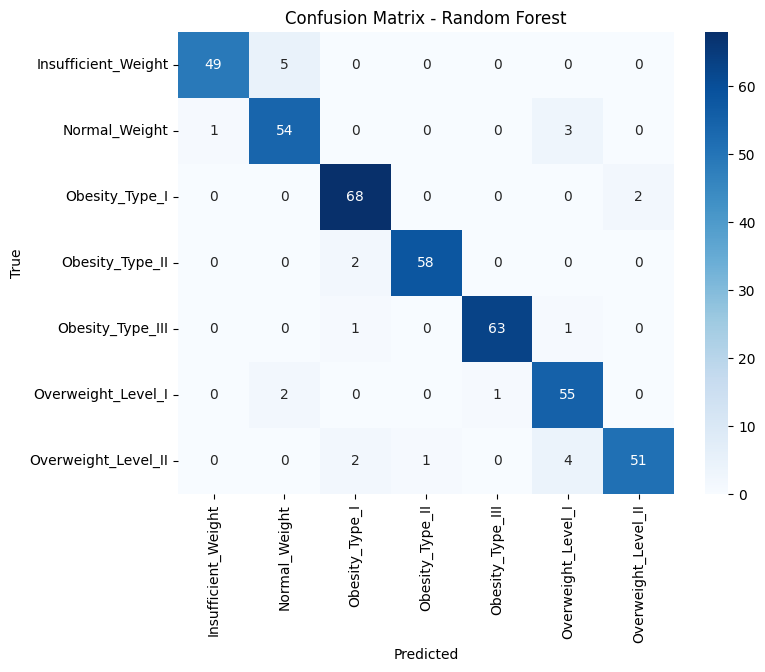


🔍 Model: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:56:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9456
Waktu komputasi: 0.2395 detik
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.93      0.92        54
      Normal_Weight       0.90      0.90      0.90        58
     Obesity_Type_I       0.96      0.96      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       0.97      0.98      0.98        65
 Overweight_Level_I       0.90      0.95      0.92        58
Overweight_Level_II       0.98      0.91      0.95        58

           accuracy                           0.95       423
          macro avg       0.95      0.94      0.94       423
       weighted avg       0.95      0.95      0.95       423



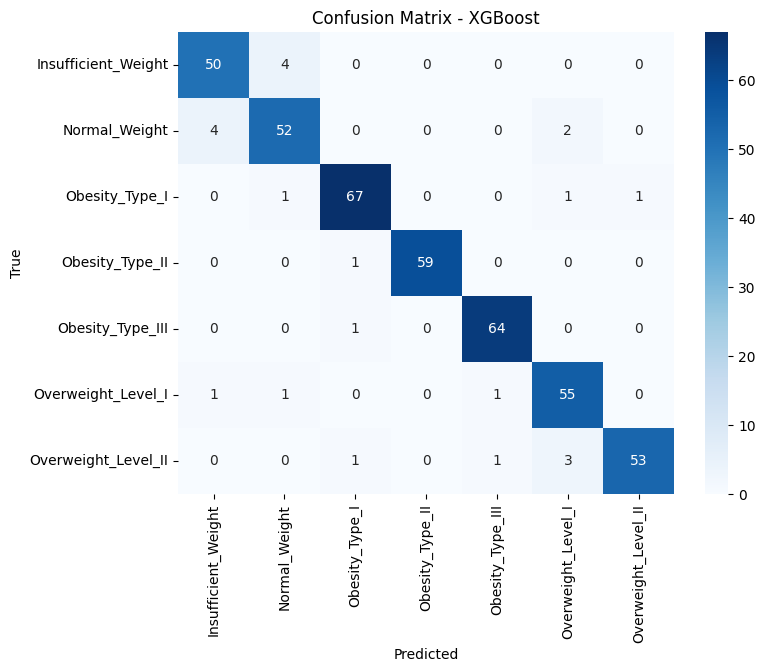


🔍 Model: Logistic Regression
Accuracy: 0.8345
Waktu komputasi: 0.0438 detik
                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.98      0.88        54
      Normal_Weight       0.78      0.67      0.72        58
     Obesity_Type_I       0.89      0.91      0.90        70
    Obesity_Type_II       0.91      0.98      0.94        60
   Obesity_Type_III       0.98      0.97      0.98        65
 Overweight_Level_I       0.67      0.59      0.62        58
Overweight_Level_II       0.75      0.71      0.73        58

           accuracy                           0.83       423
          macro avg       0.83      0.83      0.83       423
       weighted avg       0.83      0.83      0.83       423



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


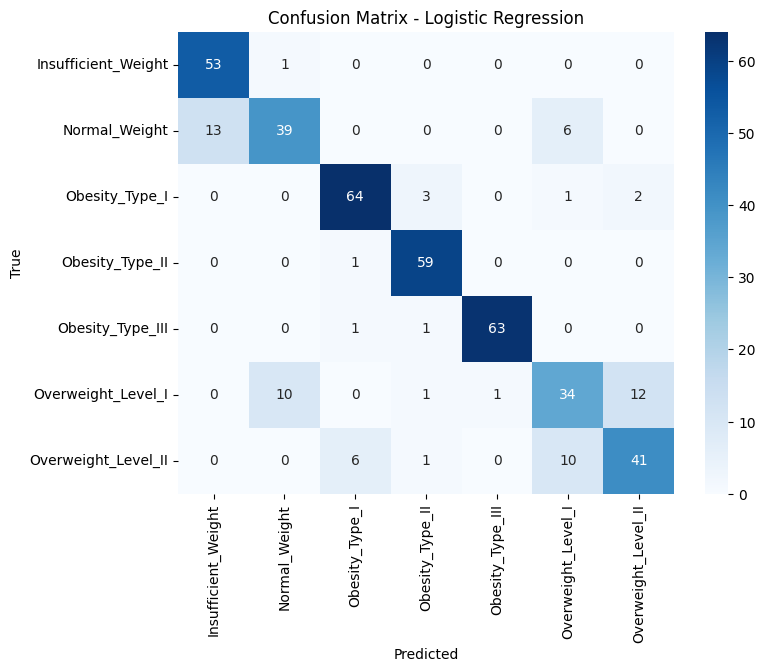

In [9]:
# 3. Modeling (tanpa hyperparameter)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

for name, model in models.items():
    print(f"\n🔍 Model: {name}")
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(f"Waktu komputasi: {end - start:.4f} detik")
    print(classification_report(y_test, y_pred, target_names=le_target.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_target.classes_, yticklabels=le_target.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


🔍 Best Params Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
🕒 Waktu Training: 2.00 detik

📈 Accuracy: 0.8652482269503546
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        54
           1       0.82      0.69      0.75        58
           2       0.92      0.93      0.92        70
           3       0.92      1.00      0.96        60
           4       0.98      0.98      0.98        65
           5       0.72      0.74      0.73        58
           6       0.85      0.71      0.77        58

    accuracy                           0.87       423
   macro avg       0.86      0.86      0.86       423
weighted avg       0.87      0.87      0.86       423



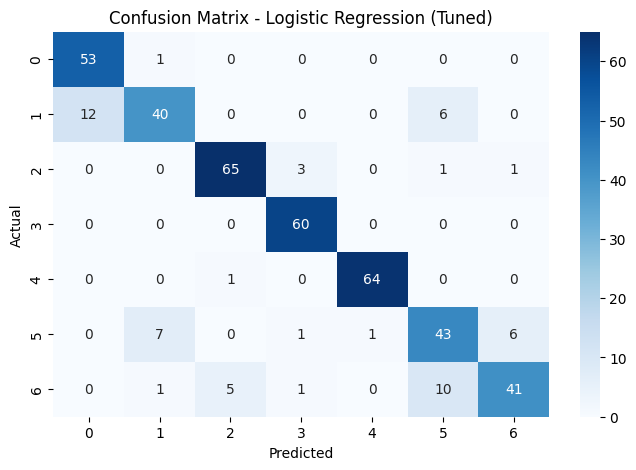

In [10]:
# 1. Hyperparameter Tuning - Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Inisialisasi model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Grid search
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

start = time.time()
grid_lr.fit(X_train_res[selected_features], y_train_res)
end = time.time()

print("\n🔍 Best Params Logistic Regression:", grid_lr.best_params_)
print("🕒 Waktu Training: {:.2f} detik".format(end - start))

# Evaluasi
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test[selected_features])
print("\n📈 Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



🔍 Best Params Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
🕒 Waktu Training: 16.59 detik

📈 Accuracy: 0.933806146572104
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        54
           1       0.85      0.91      0.88        58
           2       0.91      0.97      0.94        70
           3       0.98      0.95      0.97        60
           4       0.98      0.97      0.98        65
           5       0.90      0.95      0.92        58
           6       0.96      0.90      0.93        58

    accuracy                           0.93       423
   macro avg       0.94      0.93      0.93       423
weighted avg       0.94      0.93      0.93       423



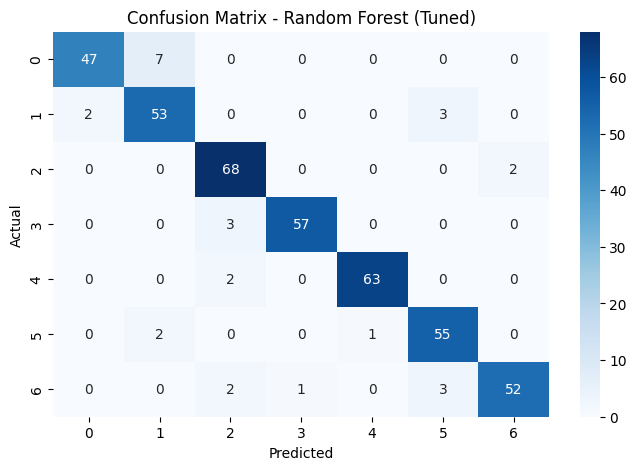

In [11]:
# 2. Hyperparameter Tuning - Random Forest
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

start = time.time()
grid_rf.fit(X_train_res[selected_features], y_train_res)
end = time.time()

print("\n🔍 Best Params Random Forest:", grid_rf.best_params_)
print("🕒 Waktu Training: {:.2f} detik".format(end - start))

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test[selected_features])
print("\n📈 Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:57:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔍 Best Params XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
🕒 Waktu Training: 10.00 detik

📈 Accuracy: 0.950354609929078
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        54
           1       0.90      0.90      0.90        58
           2       0.96      0.96      0.96        70
           3       1.00      1.00      1.00        60
           4       0.97      0.98      0.98        65
           5       0.92      0.97      0.94        58
           6       0.98      0.91      0.95        58

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



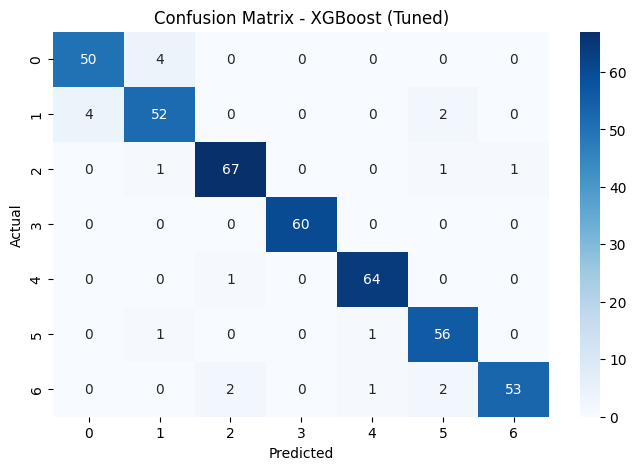

In [12]:
# 3. Hyperparameter Tuning - XGBoost
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

start = time.time()
grid_xgb.fit(X_train_res[selected_features], y_train_res)
end = time.time()

print("\n🔍 Best Params XGBoost:", grid_xgb.best_params_)
print("🕒 Waktu Training: {:.2f} detik".format(end - start))

best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test[selected_features])
print("\n📈 Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## PREPARATION DEPLOY

In [13]:
import joblib

# Simpan model hasil tuning
joblib.dump(best_xgb, 'model_xgb.pkl')

# Simpan scaler
joblib.dump(scaler, 'scaler.pkl')

# Simpan selected_features
joblib.dump(selected_features, 'selected_features.pkl')

print("✅ Model, scaler, dan fitur berhasil disimpan!")


✅ Model, scaler, dan fitur berhasil disimpan!


In [14]:
# from google.colab import files

# files.download('model_xgb.pkl')
# files.download('scaler.pkl')
# files.download('selected_features.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>